# Kmeans and Hierarchical Clustering for IRIS dataset

In [6]:
'''To demonstrate various clustering algorithms in python, the Iris dataset will be used which has three classes
in the dependent variable (three type of Iris flowers) and using this dataset clusters will be formed.'''

# Adding Preliminary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
#Importing Dataset

from sklearn import datasets
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['Type']=iris.target
iris_data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [8]:
#Preparing Data
'''Here we have the target variable ‘Type’. We need to remove the target variable so that this dataset can be used to work
in an unsupervised learning environment. The iloc function is used to get the features we require.
We also use '.values' function to get an array of the dataset.
(Note that we transformed the dataset to an array so that we can plot the graphs of the clusters).'''

iris_X = iris_data.iloc[:, [0, 1, 2,3]].values

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(iris_X)



In [9]:
'''Now we will separate the target variable from the original dataset and again convert it to an array by using numpy.'''

iris_Y = iris_data['Type']
iris_Y = np.array(iris_Y)

# IRIS dataset clustering plot

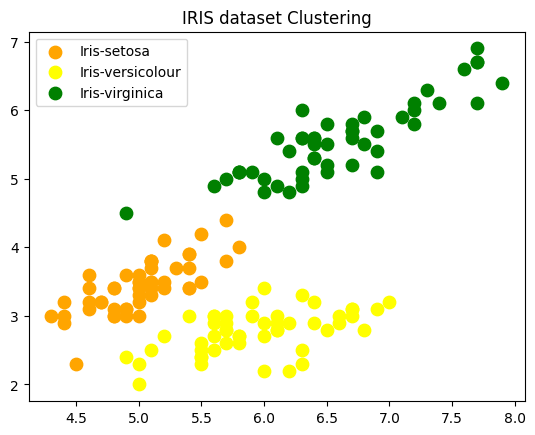

In [10]:
# Visualise Classes
'''In this IRIS dataset, we have three classes. We visualise these classes in a 2-D graph.'''

plt.scatter(iris_X[iris_Y == 0, 0], iris_X[iris_Y == 0, 1], s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[iris_Y == 1, 0], iris_X[iris_Y == 1, 1], s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[iris_Y == 2, 0], iris_X[iris_Y == 2, 2], s = 80, c = 'green', label = 'Iris-virginica')
plt.title('IRIS dataset Clustering')
plt.legend()

In [45]:
'''Kmeans is a kind of Unsupervised type of Clustering . It basically takes input from Dataset and predicts the clusters 
accordingly'''

#Import Libraries for Kmeans

from sklearn.cluster import KMeans

In [46]:
'''Implicit objective function in k-Means measures sum of distances of observations from their cluster centroids,
called Within-Cluster-Sum-of-Squares (WCSS)'''
# Assigning the WCSS
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Elbow plot (Kmeans)

Text(0, 0.5, 'WCSS')

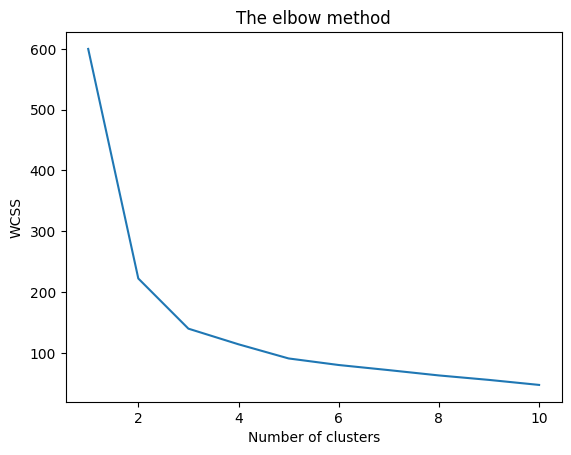

In [47]:
'''Elbow-Method using WCSS: This is based on principle that while clustering performance as measured by WCSS increases (i.e. WCSS decreases) 
with increase in k, rate of increase is usually decreasing. So performance improvement for increasing number of cluster 
from, say, 3 to 4 is higher than that for increasing from 4 to 5. '''
# Plot the Elbow method
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [48]:
# Modelling K-Means

cluster_Kmeans = KMeans(n_clusters=3)
model_kmeans = cluster_Kmeans.fit(X_scaled)
pred_kmeans = model_kmeans.labels_
pred_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

# Kmeans Clustering plot for IRIS dataset

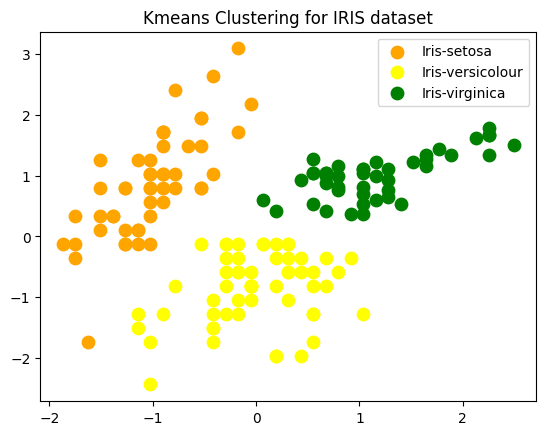

In [49]:
# Plotting the Kmeans Clustering

plt.scatter(X_scaled[pred_kmeans == 0, 0], X_scaled[pred_kmeans == 0, 1], s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(X_scaled[pred_kmeans == 1, 0], X_scaled[pred_kmeans == 1, 1], s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(X_scaled[pred_kmeans == 2, 0], X_scaled[pred_kmeans == 2, 2], s = 80, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
#plt.scatter(cluster_Kmeans.cluster_centers_[:, 0], cluster_Kmeans.cluster_centers_[:,1], s = 80, c = 'red', label = 'Centroids')
plt.title('Kmeans Clustering for IRIS dataset')
plt.legend()

# Kmeans Accuracy using KNN classifier for IRIS dataset

In [16]:
'''KNN classifier which is a type of supervised Machine Learning Technique. 
This is used to detect the accuracy and classification  of the given dataset'''

# Importing Libraries for Modelling.
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [17]:
# Assigning values of X and y from dataset

X, y = iris.data[:, :], iris.target  
''' Here X is assigned as all the column data(SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm) and
y is assigned as Species value(Iris-setosa, Iris-versicolour, Iris-virginica)  ))'''

#Setting training and testing values

Xtrain, Xtest, y_train, y_test = train_test_split(X, y)
scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

# Modeling is done using KNN classifiers.
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)


# Display the Output

print('Accuracy Score:', accuracy_score(y_test, y_pred))
print('Confusion matrix \n',  confusion_matrix(y_test, y_pred))
print('Classification \n', classification_report(y_test, y_pred))


Accuracy Score: 0.9473684210526315
Confusion matrix 
 [[15  1  0]
 [ 0 12  1]
 [ 0  0  9]]
Classification 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.92      0.92      0.92        13
           2       0.90      1.00      0.95         9

    accuracy                           0.95        38
   macro avg       0.94      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



# Cohen kappa of Kmeans for IRIS dataset

In [18]:
from sklearn.metrics import cohen_kappa_score

In [19]:
cluster = cohen_kappa_score(y_test, y_pred)
cluster


np.float64(0.9195767195767196)

In [20]:
X, y = iris.data[:, :], iris.target

Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [21]:
#Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Logistic Regression :")
print("Accuracy = ", accuracy)
print(cm)

Logistic Regression :
Accuracy =  0.9166666666666666
[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]


In [22]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

np.float64(0.8733108108108109)

In [23]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("K Nearest Neighbors :")
print("Accuracy = ", accuracy)
print(cm)

K Nearest Neighbors :
Accuracy =  0.95
[[16  0  0]
 [ 0 22  1]
 [ 0  2 19]]


In [24]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

np.float64(0.924114671163575)

In [25]:
#Support Vector Machine
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Support Vector Machine:")
print("Accuracy = ", accuracy)
print(cm)

Support Vector Machine:
Accuracy =  0.9333333333333333
[[16  0  0]
 [ 0 22  1]
 [ 0  3 18]]


In [26]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

np.float64(0.8987341772151899)

In [27]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classifier = GaussianNB()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Gaussian Naive Bayes :")
print("Accuracy = ", accuracy)
print(cm)

Gaussian Naive Bayes :
Accuracy =  0.9666666666666667
[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]


In [28]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

np.float64(0.9470899470899471)

In [29]:
#Decision Tree Classifier
from sklearn.model_selection import train_test_split
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier = DT(criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Decision Tree Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Decision Tree Classifier :
Accuracy =  0.9666666666666667
[[21  0  0]
 [ 0 29  1]
 [ 0  2 22]]


In [30]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

np.float64(0.9392220421393841)

In [31]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as RF
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
classifier = RF(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Random Forest Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Random Forest Classifier :
Accuracy =  0.9666666666666667
[[16  0  0]
 [ 0 23  0]
 [ 0  3 18]]


In [32]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

np.float64(0.9239864864864865)

# Hierarchical clustering Analysis (HCA)

In [33]:
# For Hierarchical clustering

''' Hierarchical clustering is a method of cluster analysis which seeks to build a hierarchy of clusters. It is aka Hierarchicla 
CLustering Analysis(HCA)'''

# Importing the Libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# loading Iris data
iris = datasets.load_iris()
iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['Type']=iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
# Importing Hierarchical Clustering data from scipy

import scipy.cluster.hierarchy as sch

# Hierarchical Dendogram plot for IRIS dataset

Text(0, 0.5, 'Euclidean distance in the space with other variables')

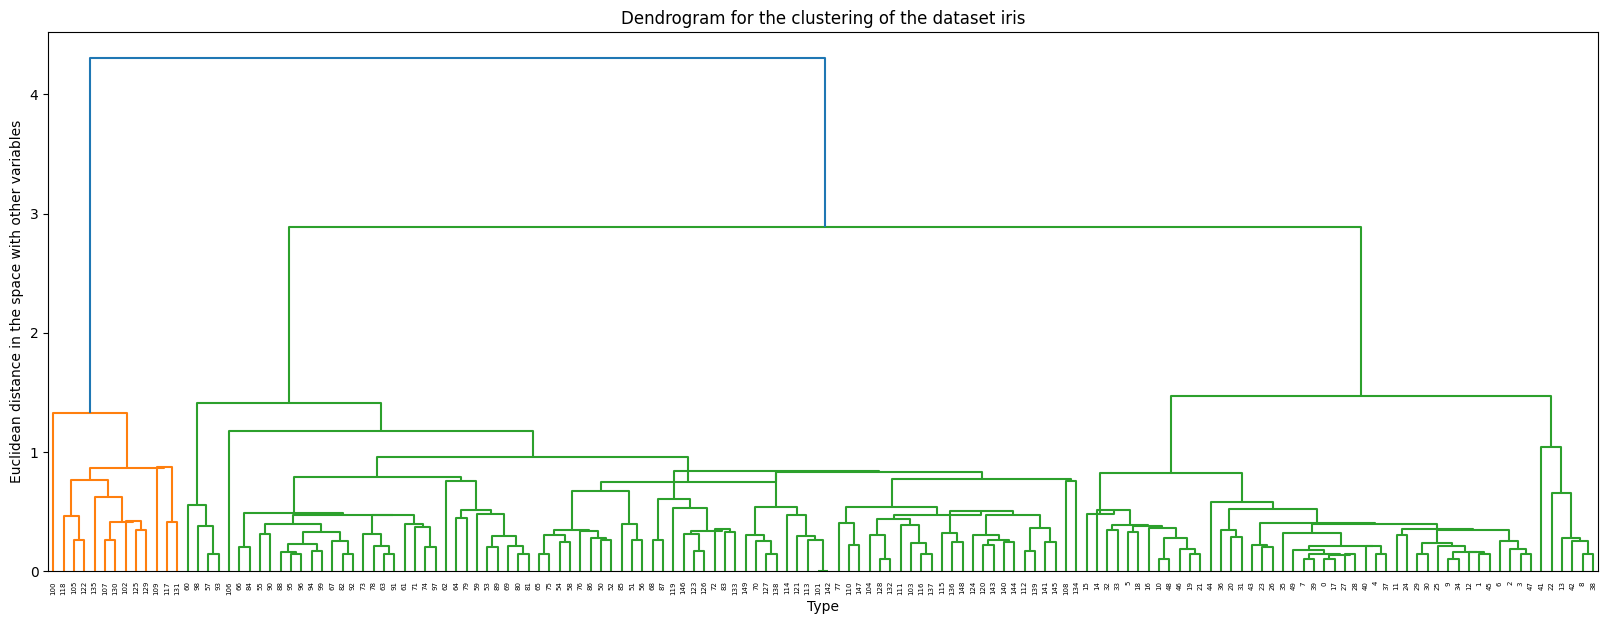

In [35]:
# Visualization of cluster hierarchy

'''To visualize the tree representing the hierarchical merging of clusters as a dendrogram'''

Z = sch.linkage(iris_X, method = 'median')
plt.figure(figsize=(20,7))

# Plotting the Dendogram

den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering of the dataset iris')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')

In [36]:
# Loading the HCA formula for clustering
cluster_H = AgglomerativeClustering(n_clusters=3)

In [37]:

# Modelling the data
model_clt = cluster_H.fit(iris_X)
model_clt
pred1 = model_clt.labels_
pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# Hierarchical cluster plot for IRIS dataset

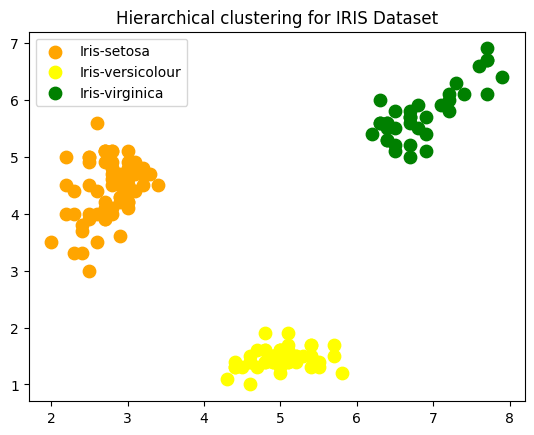

In [38]:
# Plotting the HCA Cluster

plt.scatter(iris_X[pred1 == 0, 1], iris_X[pred1 == 0, 2], s = 80, c = 'orange', label = 'Iris-setosa')
plt.scatter(iris_X[pred1 == 1, 0], iris_X[pred1 == 1, 2], s = 80, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(iris_X[pred1 == 2, 0], iris_X[pred1 == 2, 2], s = 80, c = 'green', label = 'Iris-virginica')
plt.title('Hierarchical clustering for IRIS Dataset')
plt.legend()

# Hierarchical clustering Accuracy for IRIS dataset

In [ ]:

import sklearn.metrics as sm

target = pd.DataFrame(iris.target)
#based on the dendrogram we have two clusetes 
k =3 
#build the model
HClustering = AgglomerativeClustering(n_clusters=k , affinity="euclidean",linkage="ward")
#fit the model on the dataset
HClustering.fit(iris_X)
#accuracy of the model
sm.accuracy_score(target,HClustering.labels_)


TypeError: __init__() got an unexpected keyword argument 'affinity'

# Cohen Kappa Accurucy for IRIS dataset (HCA)

In [ ]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster


0.9603340292275574

In [ ]:
'''It is observed that IRIS dataset is compatible with all the Clustering techniques'''

'It is observed that IRIS dataset is compatible with all the Clustering techniques'

In [ ]:
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [ ]:
#Logistic Regression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Logistic Regression :")
print("Accuracy = ", accuracy)
print(cm)

Logistic Regression :
Accuracy =  0.84
[[21  0  0]
 [ 0 18 12]
 [ 0  0 24]]


C:\Users\Ayantika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ayantika\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [ ]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.7619047619047619

In [ ]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("K Nearest Neighbors :")
print("Accuracy = ", accuracy)
print(cm)

K Nearest Neighbors :
Accuracy =  0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [ ]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.9483648881239243

In [ ]:
#Support Vector Machine
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Support Vector Machine:")
print("Accuracy = ", accuracy)
print(cm)

Support Vector Machine:
Accuracy =  0.9777777777777777
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


C:\Users\Ayantika\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.966190833959429

In [ ]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
classifier = GaussianNB()
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("Gaussian Naive Bayes :")
print("Accuracy = ", accuracy)
print(cm)

Gaussian Naive Bayes :
Accuracy =  0.9333333333333333
[[3 0 0]
 [0 8 0]
 [0 1 3]]


In [ ]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.8863636363636364

In [ ]:
#Decision Tree Classifier
from sklearn.model_selection import train_test_split
Xtrain, Xtest, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

classifier = DT(criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Decision Tree Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Decision Tree Classifier :
Accuracy =  0.9333333333333333
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [ ]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.966190833959429

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier as RF
classifier = RF(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(Xtrain,y_train)
y_pred = classifier.predict(Xtest)
cm = confusion_matrix(y_test,y_pred)
print("Random Forest Classifier :")
print("Accuracy = ", accuracy)
print(cm)

Random Forest Classifier :
Accuracy =  0.9333333333333333
[[16  0  0]
 [ 0 17  1]
 [ 0  2  9]]


In [ ]:
from sklearn.metrics import cohen_kappa_score
cluster = cohen_kappa_score(y_test, y_pred)
cluster

0.89749430523918